<a href="https://colab.research.google.com/github/yvpaulo/PythonMLCovid19_Previsao_Evolucao/blob/main/ModeloCovid19DIOLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Covid19
##Digital Innovation One

In [3]:
import pandas as pd
import numpy as np # lib para computação científica
from datetime import datetime #para trabalhar com datas
import plotly.express as px #para visualização (gráficos)
import plotly.graph_objects as go #para gráficos mais complexos

In [4]:
# importar dados do git 
url = 'https://github.com/yvpaulo/PythonMLCovid19_Previsao_Evolucao/blob/main/covid_19_data.csv?raw=true'

In [5]:
# criando o data frame e informando os campos que são datas
df = pd.read_csv(url, parse_dates=['ObservationDate','Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [6]:
#Conferindo tipos de cada coluna
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos agora implementar uma função para fazer a limpeza dos domes das colunas

In [7]:
#fazendo importe de lib para trabalhar com expressões regulares, obs: o recomendável é fazer os importes todos na parte superior do código
import re
#criando a função que remove caracteres especiais e espaços vazios e coloca o nomes das colunas em minúsculo.
def corrige_colunas(col_name):
  return re.sub(r"[/| ]", "", col_name).lower()

In [8]:
#testando a função
corrige_colunas("AdgE/P ou")

'adgepou'

In [9]:
#corrigindo as colunas
#Criamos uma lista e para cada coluna dentro do data frame aplicamos a função e corrigimos as colunas
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [10]:
#Vamos Agora selecionar somente os dados do Brasil
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [11]:
#testado a expressão vamos pegar somente as linhas que tenham casos confirmados
brasil = df.loc[
                (df.countryregion == 'Brazil') &
                (df.confirmed > 0)
]
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [12]:
#verificando os casos confirmados
# Gráfico da evolução dos casos confirmados
px.line(brasil, 'observationdate', 'confirmed', title='Casos Confirmados no Brasil')

#Novos casos por dia

In [13]:
#usando Técnica de programação funcional
#o resultado dessa função é transformado em uma lista que será incluída como uma nova coluna no df
#Essa função verifica se é o primeiro caso, e se for retorna 0, a partir do segundo caso retornamos hoje menos ontem
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])

))
brasil

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [14]:
#visualizando
px.line(brasil, x='observationdate', y='novoscasos', title='Novos Casos por dia')

# Verificando o Nº de mortes

In [15]:
fig =go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color':'red'})
)
#Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

#Taxa de crescimento
taxa_crescimento = (presente/passado)**(1/n) -1


In [16]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
  #Se data início for None define como a primeira data disponíel
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
  
  if data_fim == None:
    data_fim = data.observationdate.iloc[-1]
  else:
    data_fim = pd.to_datetime(data_fim)
  #Definir os valores do presente e passado
  passado = data.loc[data.observationdate == data_inicio, variable].values[0]
  presente = data.loc[data.observationdate == data_fim, variable].values[0]
  
  #Definir o número de pontos no tempo que pamos avaliar
  n = (data_fim - data_inicio).days

  #Calcular taxa
  taxa = (presente/passado)**(1/n) - 1

  return taxa*100

In [17]:
# Taxa de crescimento médio do COVID no Brasil em todo o período
taxa_crescimento(brasil, 'confirmed') #=16% ao dia

16.27183353112116

In [18]:
#Estabelecendo a taxa de crescimento diário
def taxa_crescimento_diaria(data, variable, data_inicio=None):
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable]>0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
  
  data_fim = data.observationdate.max() #para pegar a última data
  #Define o número de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days
  #Taxa calculada de um dia para o outro
  taxas = list(map(
      #(hoje - ontem) / ontem ou seja, em relação a ontem quantos casos temos a mais
      lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1])/data[variable].iloc[x-1],
      range(1, n+1) #pegando do segundo dia até o último
  ))
  return np.array(taxas) * 100

In [19]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [20]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [21]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

In [22]:
#Predições
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [23]:
#criando um novo data set
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

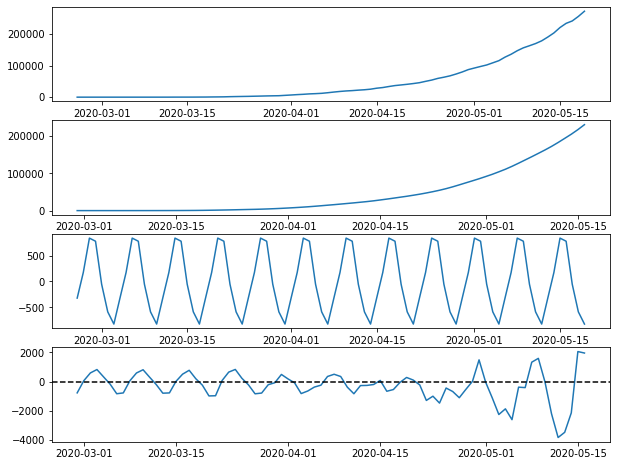

In [24]:
res = seasonal_decompose(confirmados)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

In [25]:
#modelando os dados com a biblioteca Arima
!pip install pmdarima

In [26]:
from pmdarima.arima import auto_arima

In [27]:
modelo = auto_arima(confirmados)

In [28]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados,name='Observados'
))
fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31),name='Forecast'
))
fig.update_layout(title='Previsão de cados confirmados no Brasil para os próximos 30 dias')
fig.show()

#Modelo de Crescimento
Utilizando a biblioteca fbprophet

In [ ]:
#Porém para evitar erros precisamos instalar o Anaconda que será o gerenciaodr de pacotes que se encarregará de instalar a biblioteca que queremos
#!echo $PYTHONPATH
#instalando Miniconda https://towardsdatascience.com/conda-google-colab-75f7c867a522
%%bash
MINICONDA_INSTALLER_SCRIPT='Miniconda3-4.5.4-Linux-x86_64.sh'
MINICONDA_PREFIX='/usr/local'
wget http://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


In [40]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [39]:
#atualizando o miniconda
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes


Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ld_impl_linux-64-2.33.1    |       h53a641e_7         645 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    tqdm-4.56.0                |     pyhd3eb1b0_0          76 KB
    openssl-1.1.1i             |       h27cfd23_0         3.8 MB
    python-3.6.12              |       hcff3b4d_2        34.0 MB
    pycparser-2.20             |             py_2          94 KB
    pysocks-1.7.1              |   py36h06a4308_0          30 KB
    libedit-3.1.20191231       |       h14c3975_1         121 KB
    _libgcc_mutex-0.1          |             main           3 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    readline-8.1               |       h27cfd23_0   

ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
tqdm-4.56.0          |   76 KB | ########## | 100% 
openssl-1.1.1i       |  3.8 MB | ########## | 100% 
python-3.6.12        | 34.0 MB | ########## | 100% 
pycparser-2.20       |   94 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
certifi-2020.12.5    |  144 KB | ########## | 100% 
setuptools-52.0.0    |  933 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
ca-certificates-2021 |  128 KB | ########## | 100% 
pyopenssl-20.0.1     |   48 KB | ########## | 100% 
conda-4.9.2          |  3.1 MB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
wheel-0.36.2         |   31 KB | ########## | 100% 
requests-2.2

In [42]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [43]:
!ls /usr/local/lib/python3.6/dist-packages

absl
absl_py-0.10.0.dist-info
alabaster
alabaster-0.7.12.dist-info
albumentations
albumentations-0.1.12.dist-info
altair
altair-4.1.0.dist-info
apiclient
appdirs-1.4.4.dist-info
appdirs.py
argon2
argon2_cffi-20.1.0.dist-info
asgiref
asgiref-3.3.1.dist-info
astor
astor-0.8.1.dist-info
astropy
astropy-4.1.dist-info
astunparse
astunparse-1.6.3.dist-info
async_generator
async_generator-1.10.dist-info
atari_py
atari_py-0.2.6.dist-info
atomicwrites
atomicwrites-1.4.0.dist-info
attr
attrs-20.3.0.dist-info
audioread
audioread-2.1.9.dist-info
autograd
autograd-1.3.dist-info
babel
Babel-2.9.0.dist-info
backcall
backcall-0.2.0.dist-info
beautifulsoup4-4.6.3.dist-info
bin
bleach
bleach-3.3.0.dist-info
blis
blis-0.4.1.dist-info
bokeh
bokeh-2.1.1.dist-info
bottleneck
Bottleneck-1.3.2.dist-info
branca
branca-0.4.2.dist-info
bs4
bs4-0.0.1.dist-info
bson
cachecontrol
CacheControl-0.12.6.dist-info
cachetools
cachetools-4.2.1.dist-info
caffe2
catalogue-1.0.0.dist-info
catalogue.py
certifi
certifi-2020.12

In [44]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

In [45]:
#Finalmente podemos instalar o que nos interessa agora usando o anaconda
!conda install -c conda-forge fbprophet -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.0               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    binutils_impl_linux-64-2.31.1|       h6176602_1         3.9 MB
    binutils_linux-64-2.31.1   |       h6176602_9          26 KB
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    cftime-1.2.1              

In [46]:
from fbprophet import Prophet
#precisameros agora fazer alguns preprocessamentos 

In [52]:
#Preprocessamentos
#Vamos criar dois conjuntos de dados uma para treino e outro para teste
train = confirmados.reset_index()[:-5] #estamos pegando os dados do início até os 5 últimos, estes 5 serão usados no teste
test = confirmados.reset_index()[-5:]

#Renomeando Colunas por causa da biblioteca
train.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)
test.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)

#Definir o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])
#definindo cenários
# toda populacao contaminada
pop = 211463256
train['cap']=pop

#Treinando o modelo
profeta.fit(train)

#Construir previsões futuras
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
#Fazendo gráfico para mostrar o modelo
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
#fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

In [ ]:
#Esse gráfico mostra que se não tivesse sido feito nehum tipo de controle, em novembro de 2020 toda a população brasileira teria sido contaminada
#Esse é um modelo preditivo simples.